In [1]:
import pandas as pd
import matplotlib as plt
import os
import json

In [81]:
file_name = 'ptsew_azure_uncerta(ptse)_azure.csv'
df_file_path = '../experiments/concordance/walmart_amazon/20231109/02:43/' + file_name
data_df = pd.read_csv(df_file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tteofili/dev/ellmer/experiments/concordance/walmart_amazon/20231109/02:43/ptsew_azure_uncerta(ptse)_azure.csv'

In [80]:
data_df['kt'].mean()

0.46127946127946123

In [29]:
def get_files(prefix, dir="/Users/tteofili/dev/ellmer/experiments"):
    found_files = []
    for path, currentDirectory, files in os.walk(dir):
        for file in files:
            if file.startswith(prefix):
                file_path = str(path+'/'+file)
                found_files.append(file_path)
    return found_files

In [75]:
exp_files = get_files("uncerta")
exp_files

['/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/11_08/uncerta(pase)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/02_35/uncerta(pase)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/02_40/uncerta(ptse)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/11_21/uncerta(ptse)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/abt_buy/20231128/16_20/uncerta(ptse)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/abt_buy/20231128/16_20/uncerta(pase)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/amazon_google/20231129/17_33/uncerta(ptse)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/amazon_google/20231129/17_22/uncerta(pase)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/amazon_google/20231128/16_42/uncerta(pase)_azure_results.json',
 '/Users/tteofili/dev/ellmer/experiments/amazon_google/20231128/16_44/uncerta(ptse)_azure_r

In [76]:
data = []
for exp_file in exp_files[:5]:
    with open(exp_file) as json_file:
        print(json_file)
        exp_json = json.load(json_file)
        if 'data' in exp_json:
            data.append(pd.DataFrame.from_dict(pd.json_normalize(exp_json['data']), orient='columns'))

<_io.TextIOWrapper name='/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/11_08/uncerta(pase)_azure_results.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/02_35/uncerta(pase)_azure_results.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/02_40/uncerta(ptse)_azure_results.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/tteofili/dev/ellmer/experiments/abt_buy/20231129/11_21/uncerta(ptse)_azure_results.json' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/Users/tteofili/dev/ellmer/experiments/abt_buy/20231128/16_20/uncerta(ptse)_azure_results.json' mode='r' encoding='UTF-8'>


In [77]:
all_data = pd.concat(data)
all_data.head()

,id,prediction,label,cfs,latency,ltuple.ltable_name,ltuple.ltable_description,ltuple.ltable_price,rtuple.rtable_name,rtuple.rtable_description,rtuple.rtable_price,saliency.ltable_name,saliency.ltable_description,saliency.ltable_price,saliency.rtable_name,saliency.rtable_description,saliency.rtable_price
0,1,0,0,[{'ltable_name': 'canon blue 8.0 megapixel pow...,1.030290,lg 2.0 cu . ft. over-the-range white microwave...,lg 2.0 cu . ft. over-the-range white microwave...,nan,maytag 2.0 cu . ft. over-the-range microwave oven,nan,nan,[0.6818181818181818],[0.9090909090909091],[0.6818181818181818],[0.45454545454545453],[0.45454545454545453],[0.45454545454545453]
1,2,0,0,[{'ltable_name': 'panasonic dect 6.0 black exp...,0.969023,panasonic black 8.5 ' portable dvd player dvdls83,panasonic black 8.5 ' portable dvd player dvdl...,nan,toshiba sd-p71s portable dvd player,toshiba sd-p71s 7 ' portable dvd player,119.36,[0.7391304347826086],[0.9130434782608695],[0.6086956521739131],[0.43478260869565216],[0.43478260869565216],[0.43478260869565216]
2,3,1,1,[{'ltable_name': 'sony silver cyber-shot digit...,0.952781,sony bravia theater black micro system davis50b,sony bravia theater black micro system davis50...,nan,sony bravia dav-is50 / b home theater system,"dvd player , 5.1 speakers 1 disc ( s ) progres...",nan,[0.9473684210526314],[0.7894736842105263],[0.5263157894736842],[0.5263157894736842],[0.5789473684210527],[0.5263157894736842]
3,4,0,0,[{'ltable_name': 'panasonic dect 6.0 expandabl...,0.963242,panasonic dect 6.0 expandable digital cordless...,panasonic dect 6.0 expandable digital cordless...,139.0,panasonic kx-tg9342t cordless phone,"1 x phone line ( s ) black , metallic",nan,[0.5588235294117647],[0.6764705882352942],[0.7058823529411765],[0.29411764705882354],[0.29411764705882354],[0.29411764705882354]
4,5,0,0,[{'ltable_name': 'sony cyber-shot black digita...,0.954998,sony cyber-shot black digital camera dsch10b,sony dsch10 cyber-shot black digital camera ds...,nan,sony handycam dcr-sr85 digital camcorder dcrsr85,16:9 2.7 ' hybrid lcd,375.8,[0.7142857142857143],[0.857142857142857],[0.7619047619047619],[0.47619047619047616],[0.47619047619047616],[0.47619047619047616]


In [78]:
for c in all_data.columns:
    if c.startswith('saliency.'):
        all_data[c] = all_data[c].apply(lambda x : x[0] if type(x) == list else x)
all_data.head()

,id,prediction,label,cfs,latency,ltuple.ltable_name,ltuple.ltable_description,ltuple.ltable_price,rtuple.rtable_name,rtuple.rtable_description,rtuple.rtable_price,saliency.ltable_name,saliency.ltable_description,saliency.ltable_price,saliency.rtable_name,saliency.rtable_description,saliency.rtable_price
0,1,0,0,[{'ltable_name': 'canon blue 8.0 megapixel pow...,1.030290,lg 2.0 cu . ft. over-the-range white microwave...,lg 2.0 cu . ft. over-the-range white microwave...,nan,maytag 2.0 cu . ft. over-the-range microwave oven,nan,nan,0.681818,0.909091,0.681818,0.454545,0.454545,0.454545
1,2,0,0,[{'ltable_name': 'panasonic dect 6.0 black exp...,0.969023,panasonic black 8.5 ' portable dvd player dvdls83,panasonic black 8.5 ' portable dvd player dvdl...,nan,toshiba sd-p71s portable dvd player,toshiba sd-p71s 7 ' portable dvd player,119.36,0.739130,0.913043,0.608696,0.434783,0.434783,0.434783
2,3,1,1,[{'ltable_name': 'sony silver cyber-shot digit...,0.952781,sony bravia theater black micro system davis50b,sony bravia theater black micro system davis50...,nan,sony bravia dav-is50 / b home theater system,"dvd player , 5.1 speakers 1 disc ( s ) progres...",nan,0.947368,0.789474,0.526316,0.526316,0.578947,0.526316
3,4,0,0,[{'ltable_name': 'panasonic dect 6.0 expandabl...,0.963242,panasonic dect 6.0 expandable digital cordless...,panasonic dect 6.0 expandable digital cordless...,139.0,panasonic kx-tg9342t cordless phone,"1 x phone line ( s ) black , metallic",nan,0.558824,0.676471,0.705882,0.294118,0.294118,0.294118
4,5,0,0,[{'ltable_name': 'sony cyber-shot black digita...,0.954998,sony cyber-shot black digital camera dsch10b,sony dsch10 cyber-shot black digital camera ds...,nan,sony handycam dcr-sr85 digital camcorder dcrsr85,16:9 2.7 ' hybrid lcd,375.8,0.714286,0.857143,0.761905,0.476190,0.476190,0.476190


<Axes: xlabel='id', ylabel='latency'>

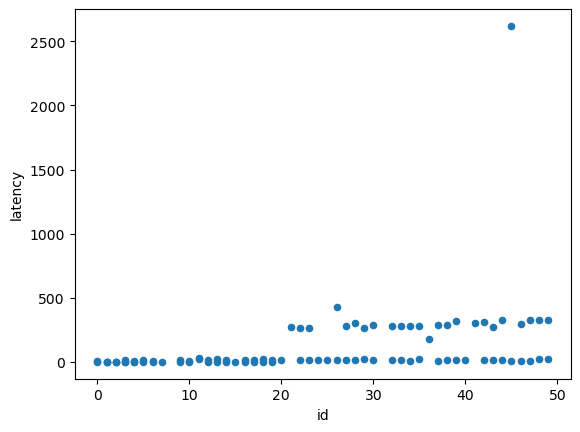

In [79]:
all_data.plot.scatter(x='id', y='latency')